In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sys
import os
import matplotlib.pyplot as plt

import shared

## USAGE: python generate-landmarks/k_random.py <dataset_path> <k_samples> <method>
## ./datasets/qtables/ 1000 PCA

dataset_path = '../datasets/minigaussians/' #sys.argv[1]
k = 'nt' # sys.argv[2]
#method = sys.argv[3]

X, info_df, categories = shared.read_dataset(dataset_path)
T = len(X)
N = len(info_df)


if k == 'nt':
    k = N * T
elif k == 'n':
    k = N
else:
    k = int(k)

assert k <= T * N, 'k larger than N*T.'

X = np.array(X).reshape(T * N, -1)
indexes = np.random.choice(T * N, k)
X = X[indexes]
categories = categories[indexes % N]

In [4]:
categories

array([3, 6, 5, ..., 1, 4, 6])

In [7]:
Y = np.array([categories + np.random.normal(0, .1, len(categories)) - 5,
              np.random.normal(0, .1, len(categories))]).T

In [8]:
# Create single df with both X and Y to save in disk and open on the next script
X_df = pd.DataFrame(X, columns=['x'+str(i) for i in range(X.shape[1])])
Y_df = pd.DataFrame(Y, columns=['y'+str(i) for i in range(Y.shape[1])])
df = pd.concat([X_df, Y_df], axis=1)

dataset_id = os.path.basename(os.path.dirname(dataset_path))

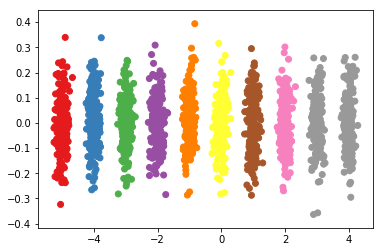

In [9]:
fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c=categories, cmap=plt.cm.get_cmap('Set1'))
plt.show()
# fig.savefig('generate-landmarks/output/{}-{}-{}-{}.png'.format(dataset_id, 'krandom', sys.argv[2], method))

# out = 'generate-landmarks/output/{}-{}-{}-{}.csv'.format(dataset_id, 'krandom', sys.argv[2], method)
# df.to_csv(out)

In [11]:
fig.savefig('./output/{}-{}-{}-{}.png'.format(dataset_id, 'row', 'nt', '!'))

out = './output/{}-{}-{}-{}.csv'.format(dataset_id, 'row', 'n', '!')
df.to_csv(out)